In [ ]:
! pip install subword-nmt
! pip install nltk
! pip install torchtext

In [ ]:
import os
import re
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
!ls

public_test.zip  reference.zip	test	  train		 transform
reference	 sample_data	test.zip  train_new.zip


In [ ]:
!unzip -q train_new.zip -d ./train
!unzip -q public_test.zip -d  ./test
!unzip -q reference.zip -d  ./reference

replace ./train/generic/norm/20103011022200910379001_0_part_0.norm? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace ./test/generic/20226011033302006726002_2_part_0.ann? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace ./reference/generic/20227011054408684110020_10_part_0_.norm? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
texts = {}
anns = {}
norms = {}
    
for part in [
             "train/generic/texts_and_ann",
             "train/generic/norm"
            ]:

    files = os.listdir(f"{part}")
    
    for file in files:
        if file[-4:] == "norm":
            name = file[:-5]
            
            norm = open(f"{part}/{file}", encoding='utf-8').read().strip().split('\n')
            norms[name] = norm

        else:
            name = file[:-4]

            if file[-3:] == "txt":
                text = open(f"{part}/{file}", encoding='utf-8').read()
                texts[name] = text
                
            elif file[-3:] == "ann":
                ann = open(f"{part}/{file}", encoding='utf-8').read().strip().split('\n')
                anns[name] = ann

In [ ]:
len(texts), len(anns), len(norms)

(188, 188, 188)

In [ ]:
m = 0
N = 10

f = open(f"data.tsv", 'w', encoding='utf-8')
count = 0
for name in tqdm(texts):
    
    text = texts[name]
    ann = anns[name]
    norm = norms[name]

#     print(ann, text, norm)
#     break

    for line in ann:
        count += 1
        spans = list(map(int, line.strip().split()))
        old_text = ''
        st = []
        fin = []
        while spans:
#             print(spans, norm, name, )
            start, stop = spans[0], spans[1]
            st.append(start)
            fin.append(stop)
            old_text += text[start:stop] + ' '
            spans = spans[2:]

            
        old_text = text[:min(st)] + ' $ ' + old_text + ' & ' + text[max(fin):]
        new_text = text[:min(st)] + ' $ ' + norm[0] + ' & ' + text[max(fin):]
        
        norm = norm[1:]

        old_text_split = old_text.split()
        ind_old1, ind_old2 = old_text_split.index('$'), old_text_split.index('&')
        if ind_old1 - N > 0:
            old_text = ' '.join(old_text_split[ind_old1 - N: ind_old2 + N + 1])
        else:
            old_text = ' '.join(old_text_split[0: ind_old2 + N + 1])

        new_text_split = new_text.split()
        ind_old1, ind_old2 = new_text_split.index('$'), new_text_split.index('&')
        if ind_old1 - N > 0:
            new_text = ' '.join(new_text_split[ind_old1 - N: ind_old2 + N + 1])
        else:
            new_text = ' '.join(new_text_split[0: ind_old2 + N + 1])

        if (count - 1) in [8149, 10164, 19246, 
                           22614, 22698, 23189,
                           31754, 31793, 31796,
                           31835, 32990, 35337, 
                           41281, 47493, 54333]:
            print(count - 1, old_text)
            old_text = old_text[1:]
            new_text = new_text[1:]
        else:
            f.write(f"{old_text}\t{new_text}\n")
        if m < len(text.split()):
            m = len(text.split())
    # break
print(count, m)

8149 " 14 . Эффективность использования субсидии определяется на основании следующего $ показателя результативности использования субсидии & : процент технической готовности объекта . Оценка эффективности использования субсидии
10164 "Интернет». Подготовка педагогических кадров. Впервые в 2013-2014 учебном году в $ системе образования & района используется дистанционное образование. В 2012 году все образовательные учреждения
19246 "Об утверждении Правил предоставления и распределения субсидий из федерального бюджета $ бюджетам & субъектов Российской Федерации для осуществления мероприятий по реализации стратегий социально-экономического
22614 "Об утверждении примерного перечня мероприятий в области энергосбережения и повышения $ энергетической эффективности & , который может быть использован в целях разработки региональных, муниципальных
22698 "Об утверждении примерного перечня мероприятий в области энергосбережения и повышения $ энергетической эффективности & , который может быть испо

In [ ]:
df = pd.read_csv('data.tsv', sep='\t', names=['src', 'trg'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54333 entries, 0 to 54332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   src     54333 non-null  object
 1   trg     54333 non-null  object
dtypes: object(2)
memory usage: 849.1+ KB


In [ ]:
texts_test = {}
anns_test = {}
norms_test = {}


name_in_ref = []

for part in [
             "reference/generic",
             "test/generic"
            ]:

    files = os.listdir(f"{part}")
    for file in files:
        if file[-4:] == "norm":
            name = file[:-5]
            name_in_ref.append(name)
            norm = open(f"{part}/{file}", encoding='utf-8').read().strip().split('\n')
            norms_test[name] = norm
        else:

            name = file[:-4]
            if name in name_in_ref:
                if file[-3:] == "txt":
                    text_test = open(f"{part}/{file}", encoding='utf-8').read()
                    texts_test[name] = text_test
                    
                elif file[-3:] == "ann":
                    ann_test = open(f"{part}/{file}", encoding='utf-8').read().strip().split('\n')
                    anns_test[name] = ann_test

In [ ]:
len(norms_test), len(texts_test), len(anns_test)

(30, 30, 30)

In [ ]:
m = 0
N = 10

f = open(f"data_test.tsv", 'w', encoding='utf-8')
count = 0
for name in tqdm(texts_test):
    
    text_test = texts_test[name]
    ann_test = anns_test[name]
    norm_test = norms_test[name]

    for line in ann_test:
        count += 1
        spans = list(map(int, line.strip().split()))
        old_text = ''
        st = []
        fin = []
        while spans:
            start, stop = spans[0], spans[1]
            st.append(start)
            fin.append(stop)
            old_text += text_test[start:stop] + " "
                
            spans = spans[2:]


        old_text = text_test[:min(st)] + ' $ ' + old_text + ' & ' + text_test[max(fin):]
        new_text = text_test[:min(st)] + ' $ ' + norm_test[0] + ' & ' + text_test[max(fin):]
        norm_test = norm_test[1:]

        old_text_split = old_text.split()
        ind_old1, ind_old2 = old_text_split.index('$'), old_text_split.index('&')
        if ind_old1 - N > 0:
            old_text = ' '.join(old_text_split[ind_old1 - N: ind_old2 + N + 1])
        else:
            old_text = ' '.join(old_text_split[0: ind_old2 + N + 1])

        new_text_split = new_text.split()
        ind_old1, ind_old2 = new_text_split.index('$'), new_text_split.index('&')
        if ind_old1 - N > 0:
            new_text = ' '.join(new_text_split[ind_old1 - N: ind_old2 + N + 1])
        else:
            new_text = ' '.join(new_text_split[0: ind_old2 + N + 1])

        if (count - 1) in [5103]:
            print(count - 1)
            print(old_text)
            old_text = old_text[1:]
            new_text = new_text[1:]
            f.write(f"{old_text}\t{new_text}\t{name}\n")
        else:
            f.write(f"{old_text}\t{new_text}\t{name}\n")
        if m < len(text.split()):
            m = len(text.split())
    # break
print(count, m)

5103
" . Цель подпрограммы : Реализация программ , направленных на $ улучшение & жилищных условий отдельных категорий граждан , проживающих на территории МО

8455 2198


In [ ]:
df_test = pd.read_csv('data_test.tsv', sep='\t', names=['src', 'trg', 'filename'])

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8455 entries, 0 to 8454
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   src       8455 non-null   object
 1   trg       8455 non-null   object
 2   filename  8455 non-null   object
dtypes: object(3)
memory usage: 198.3+ KB


In [ ]:
import shutil

import torch
import torch.nn as nn
import torch.optim as optim

import torchtext
from torchtext.legacy.data import Field, BucketIterator

import random
import math
import time
import numpy as np

import matplotlib
matplotlib.rcParams.update({'figure.figsize': (16, 12), 'font.size': 14})
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from IPython.display import clear_output

from nltk.tokenize import WordPunctTokenizer

In [ ]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
tokenizer_W = WordPunctTokenizer()

# def tokenize(x, tokenizer=tokenizer_W):
#     return tokenizer.tokenize(x.lower())

def tokenize(x, tokenizer=tokenizer_W):
    return tokenizer.tokenize(x)

def tokenize2(x):
    return x

In [ ]:
# SRC = Field(tokenize=tokenize,
#             init_token = '<sos>', 
#             eos_token = '<eos>', 
#             lower = True)

TRG = Field(tokenize=tokenize,
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True,
            batch_first = True)

TRG2 = Field(tokenize=tokenize2,
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = False,
            batch_first = True)


dataset = torchtext.legacy.data.TabularDataset(
    path='data.tsv',
    format='tsv',
    fields=[('src', TRG), ('trg', TRG)]
)
test_data = torchtext.legacy.data.TabularDataset(
    path='data_test.tsv',
    format='tsv',
    fields=[('src', TRG), ('trg', TRG), ('name', TRG2)]
)

In [ ]:
train_data, valid_data = dataset.split(split_ratio=[0.8, 0.2])
len(train_data) + len(valid_data), len(test_data)

(54333, 8455)

In [ ]:


print(f"Number of training examples: {len(train_data.examples)}")
print(f"Number of validation examples: {len(valid_data.examples)}")
print(f"Number of testing examples: {len(test_data.examples)}")

Number of training examples: 43466
Number of validation examples: 10867
Number of testing examples: 8455


In [ ]:
TRG.build_vocab(train_data, min_freq = 1)

In [ ]:
print(f"Unique tokens in vocabulary: {len(TRG.vocab)}")

Unique tokens in vocabulary: 23710


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
def _len_sort_key(x):
    return len(x.src)

BATCH_SIZE = 128

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE, 
    device = device,
    sort_key=_len_sort_key
)

In [ ]:
class Encoder(nn.Module):
    def __init__(self, 
                 input_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim,
                 dropout, 
                 device,
                 max_length = 100):
        super().__init__()

        self.device = device
        
        self.tok_embedding = nn.Embedding(input_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        
        self.layers = nn.ModuleList([EncoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim,
                                                  dropout, 
                                                  device) 
                                     for _ in range(n_layers)])
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, src, src_mask):
        
        #src = [batch size, src len]
        #src_mask = [batch size, 1, 1, src len]
        
        batch_size = src.shape[0]
        src_len = src.shape[1]
        
        pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        
        #pos = [batch size, src len]
        
        src = self.dropout((self.tok_embedding(src) * self.scale) + self.pos_embedding(pos))
        
        #src = [batch size, src len, hid dim]
        
        for layer in self.layers:
            src = layer(src, src_mask)
            
        #src = [batch size, src len, hid dim]
            
        return src

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim,  
                 dropout, 
                 device):
        super().__init__()
        
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src, src_mask):
        
        #src = [batch size, src len, hid dim]
        #src_mask = [batch size, 1, 1, src len] 
                
        #self attention
        _src, _ = self.self_attention(src, src, src, src_mask)
        
        #dropout, residual connection and layer norm
        src = self.self_attn_layer_norm(src + self.dropout(_src))
        
        #src = [batch size, src len, hid dim]
        
        #positionwise feedforward
        _src = self.positionwise_feedforward(src)
        
        #dropout, residual and layer norm
        src = self.ff_layer_norm(src + self.dropout(_src))
        
        #src = [batch size, src len, hid dim]
        
        return src

In [ ]:
class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device):
        super().__init__()
        
        assert hid_dim % n_heads == 0
        
        self.hid_dim = hid_dim
        self.n_heads = n_heads
        self.head_dim = hid_dim // n_heads
        
        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)
        
        self.fc_o = nn.Linear(hid_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
        
    def forward(self, query, key, value, mask = None):
        
        batch_size = query.shape[0]
        
        #query = [batch size, query len, hid dim]
        #key = [batch size, key len, hid dim]
        #value = [batch size, value len, hid dim]
                
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)
        
        #Q = [batch size, query len, hid dim]
        #K = [batch size, key len, hid dim]
        #V = [batch size, value len, hid dim]
                
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        
        #Q = [batch size, n heads, query len, head dim]
        #K = [batch size, n heads, key len, head dim]
        #V = [batch size, n heads, value len, head dim]
                
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
        
        #energy = [batch size, n heads, query len, key len]
        
        if mask is not None:
            energy = energy.masked_fill(mask == 0, -1e10)

        # [batch size, 1, trg len, trg len]
        
        attention = torch.softmax(energy, dim = -1)
                
        #attention = [batch size, n heads, query len, key len]
                
        x = torch.matmul(self.dropout(attention), V)
        
        #x = [batch size, n heads, query len, head dim]
        
        x = x.permute(0, 2, 1, 3).contiguous()
        
        #x = [batch size, query len, n heads, head dim]
        
        x = x.view(batch_size, -1, self.hid_dim)
        
        #x = [batch size, query len, hid dim]
        
        x = self.fc_o(x)
        
        #x = [batch size, query len, hid dim]
        
        return x, attention

In [ ]:
class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hid_dim, pf_dim, dropout):
        super().__init__()
        
        self.fc_1 = nn.Linear(hid_dim, pf_dim)
        self.fc_2 = nn.Linear(pf_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        #x = [batch size, seq len, hid dim]
        
        x = self.dropout(torch.relu(self.fc_1(x)))
        
        #x = [batch size, seq len, pf dim]
        
        x = self.fc_2(x)
        
        #x = [batch size, seq len, hid dim]
        
        return x

In [ ]:
class Decoder(nn.Module):
    def __init__(self, 
                 output_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim, 
                 dropout, 
                 device,
                 max_length = 100):
        super().__init__()
        
        self.device = device
        
        self.tok_embedding = nn.Embedding(output_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        
        self.layers = nn.ModuleList([DecoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim, 
                                                  dropout, 
                                                  device)
                                     for _ in range(n_layers)])
        
        self.fc_out = nn.Linear(hid_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]
                
        batch_size = trg.shape[0]
        trg_len = trg.shape[1]
        
        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
                            
        #pos = [batch size, trg len]
            
        trg = self.dropout((self.tok_embedding(trg) * self.scale) + self.pos_embedding(pos))
                
        #trg = [batch size, trg len, hid dim]
        
        for layer in self.layers:
            trg, attention = layer(trg, enc_src, trg_mask, src_mask)
        
        #trg = [batch size, trg len, hid dim]
        #attention = [batch size, n heads, trg len, src len]
        
        output = self.fc_out(trg)
        
        #output = [batch size, trg len, output dim]
            
        return output, attention

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim, 
                 dropout, 
                 device):
        super().__init__()
        
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.enc_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.encoder_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len, hid dim]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]
        
        #self attention
        _trg, _ = self.self_attention(trg, trg, trg, trg_mask)
        
        #dropout, residual connection and layer norm
        trg = self.self_attn_layer_norm(trg + self.dropout(_trg))
            
        #trg = [batch size, trg len, hid dim]
            
        #encoder attention
        _trg, attention = self.encoder_attention(trg, enc_src, enc_src, src_mask)
        
        #dropout, residual connection and layer norm
        trg = self.enc_attn_layer_norm(trg + self.dropout(_trg))
                    
        #trg = [batch size, trg len, hid dim]
        
        #positionwise feedforward
        _trg = self.positionwise_feedforward(trg)
        
        #dropout, residual and layer norm
        trg = self.ff_layer_norm(trg + self.dropout(_trg))
        
        #trg = [batch size, trg len, hid dim]
        #attention = [batch size, n heads, trg len, src len]
        
        return trg, attention

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, 
                 encoder, 
                 decoder, 
                 src_pad_idx, 
                 trg_pad_idx, 
                 device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device
        
    def make_src_mask(self, src):
        
        #src = [batch size, src len]
        
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)

        #src_mask = [batch size, 1, 1, src len]

        return src_mask
    
    def make_trg_mask(self, trg):
        
        #trg = [batch size, trg len]
        
        trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2)
        
        #trg_pad_mask = [batch size, 1, 1, trg len]
        
        trg_len = trg.shape[1]
        
        trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device = self.device)).bool()
        
        #trg_sub_mask = [trg len, trg len]

        # [batch_size, 1, trg_len, trg_len]
            
        trg_mask = trg_pad_mask & trg_sub_mask
        
        #trg_mask = [batch size, 1, trg len, trg len]
        
        return trg_mask

    def forward(self, src, trg):
        
        #src = [batch size, src len]
        #trg = [batch size, trg len]
                
        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)
        
        #src_mask = [batch size, 1, 1, src len]
        #trg_mask = [batch size, 1, trg len, trg len]
        
        enc_src = self.encoder(src, src_mask)
        
        #enc_src = [batch size, src len, hid dim]
                
        output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)
        
        #output = [batch size, trg len, output dim]
        #attention = [batch size, n heads, trg len, src len]
        
        return output, attention

In [ ]:
INPUT_DIM = len(TRG.vocab)
OUTPUT_DIM = len(TRG.vocab)
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

enc = Encoder(INPUT_DIM, 
              HID_DIM, 
              ENC_LAYERS, 
              ENC_HEADS, 
              ENC_PF_DIM, 
              ENC_DROPOUT, 
              device)

dec = Decoder(OUTPUT_DIM, 
              HID_DIM, 
              DEC_LAYERS, 
              DEC_HEADS, 
              DEC_PF_DIM, 
              DEC_DROPOUT, 
              device)

In [ ]:
TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

model = Seq2Seq(enc, dec, TRG_PAD_IDX, TRG_PAD_IDX, device).to(device)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 22,237,854 trainable parameters


In [ ]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

In [ ]:
model.apply(initialize_weights);

In [ ]:
LEARNING_RATE = 5e-4

optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)

In [ ]:
criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

In [ ]:
def train(model, iterator, optimizer, criterion, clip, train_history=None, valid_history=None):
    
    model.train()
    
    epoch_loss = 0
    history = []
    for i, batch in enumerate(iterator):
        
        src = batch.src
        trg = batch.trg
        # print(src.shape, trg.shape)
        # break
        optimizer.zero_grad()
        
        output, _ = model(src, trg[:,:-1])
        # print(output.shape)
        #output = [batch size, trg len - 1, output dim]
        #trg = [batch size, trg len]
            
        output_dim = output.shape[-1]
            
        output = output.contiguous().view(-1, output_dim)
        trg = trg[:,1:].contiguous().view(-1)
                
        #output = [batch size * trg len - 1, output dim]
        #trg = [batch size * trg len - 1]
        # print(output.shape, trg.shape)
        # break
        loss = criterion(output, trg)
        
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()

        history.append(loss.cpu().data.numpy())
        if (i+1)%10==0:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

            clear_output(True)
            ax[0].plot(history, label='train loss')
            ax[0].set_xlabel('Batch')
            ax[0].set_title('Train loss')
            if train_history is not None:
                ax[1].plot(train_history, label='general train history')
                ax[1].set_xlabel('Epoch')
            if valid_history is not None:
                ax[1].plot(valid_history, label='general valid history')
            plt.legend()
            
            plt.show()
        
    return epoch_loss / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    model.eval()
    
    epoch_loss = 0
    
    with torch.no_grad():
    
        for i, batch in enumerate(iterator):

            src = batch.src
            trg = batch.trg

            output, _ = model(src, trg[:,:-1])
            
            #output = [batch size, trg len - 1, output dim]
            #trg = [batch size, trg len]
            
            output_dim = output.shape[-1]
            
            output = output.contiguous().view(-1, output_dim)
            trg = trg[:,1:].contiguous().view(-1)
            
            #output = [batch size * trg len - 1, output dim]
            #trg = [batch size * trg len - 1]
            
            loss = criterion(output, trg)

            epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

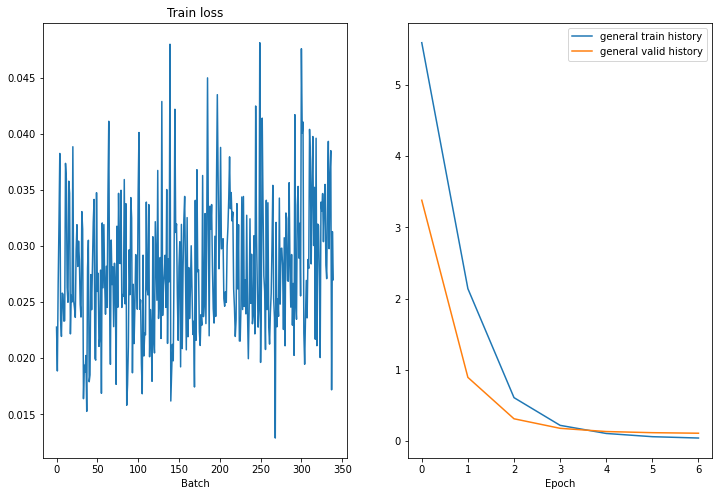

Epoch: 08 | Time: 0m 53s
	Train Loss: 0.028 | Train PPL:   1.028
	 Val. Loss: 0.106 |  Val. PPL:   1.112


In [ ]:
train_history = []
valid_history = []

N_EPOCHS = 8
CLIP = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP, train_history, valid_history)
    valid_loss = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best-val-model.pt')
    
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

In [ ]:
model.load_state_dict(torch.load('best-val-model.pt'))

<All keys matched successfully>

In [ ]:
def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50):
    
    model.eval()
        
    if isinstance(sentence, str):
        nlp = spacy.load('de_core_news_sm')
        tokens = [token.text.lower() for token in nlp(sentence)]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
        
    src_indexes = [src_field.vocab.stoi[token] for token in tokens]

    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)
    
    src_mask = model.make_src_mask(src_tensor)
    
    with torch.no_grad():
        enc_src = model.encoder(src_tensor, src_mask)

    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):

        trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(0).to(device)

        trg_mask = model.make_trg_mask(trg_tensor)
        
        with torch.no_grad():
            output, attention = model.decoder(trg_tensor, enc_src, trg_mask, src_mask)
        
        pred_token = output.argmax(2)[:,-1].item()
        
        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break
    
    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]
    
    return trg_tokens[1:], attention

In [ ]:
if os.path.exists(f"transform"):
    shutil.rmtree(f"transform")
    
os.mkdir(f"transform")
os.mkdir(f"transform/generic")
os.mkdir(f"transform/named")

In [ ]:
pred_name = '-'
for example_idx in tqdm(range(df_test.shape[0])):

    src = vars(test_data.examples[example_idx])['src']
    trg = vars(test_data.examples[example_idx])['trg']
    name = vars(test_data.examples[example_idx])['name']
    translation, _ = translate_sentence(src, TRG, TRG, model, device)


    if '$' in translation and '&' in translation:
        translation = ' '.join(translation[:-1])
        translation = translation.split('$')[1].split('&')[0].strip()
    else:
        translation = ' '.join(src[:-1])
        translation = translation.split('$')[1].split('&')[0].strip()





    if pred_name != name:
        f = open(f"transform/generic/{name}.norm", 'w', encoding='utf-8')
    pred_name = name

    f.write(f"{translation}\n")

    

In [ ]:
!zip -r -q transform2.zip transform

In [ ]:
!zip -r -q data1.zip data.tsv
!zip -r -q data_test1.zip data_test.tsv

In [ ]:
import sys
import os

import re

generic_size = 536
named_size = 4370

In [ ]:
def regularize(text):
    text = re.sub("Ё", "Е", text)
    text = re.sub("ё", "е", text)
    text = re.sub(" +", " ", text)

    return text

In [ ]:
def generic_score(true_dir, set_dir):
#     if len(os.listdir(set_dir)) != generic_size:
#         return 0.0
    filenames = os.listdir(f"{true_dir}/generic")
    
    n = 0
    hits = 0
    count_error = 0
    for name in filenames:
        gt = open(f"{true_dir}/generic/{name}", encoding='utf-8').read().strip()

        gt = regularize(gt)
        gt = re.sub(" ", "", gt)

        gt_lines = gt.split('\n')

#         if not os.path.exists(f"{set_dir}/{name}"):
#             return 0.0

        sub = open(f"{set_dir}/{name}", encoding='utf-8').read().strip()

        sub = regularize(sub)
        sub = re.sub(" ", "", sub)

        sub_lines = sub.split('\n')
        
        print('\n============Имя файла: ', name)
        
        for gt, sub in zip(gt_lines, sub_lines):
            n += 1
            if gt.lower() == sub.lower():
                hits += 1
            else:
                print('\nВерно: ',gt, '\nПолучилось: ', sub)
                count_error += 1

    print('Число ошибок: ', count_error)
    return hits / n

In [ ]:
true_dir = "./reference"
predict_dir = "./transform"
if not os.path.exists('score'):
    os.mkdir('score')
output_stream = open("scores.txt", "w")

set_1_dir = os.path.join(predict_dir, "generic")
set_2_dir = os.path.join(predict_dir, "named")

set_1_score = 0.0
set_2_score = 0.0

# Generic spans
if not os.path.exists(set_1_dir) or len(os.listdir(set_1_dir)) == 0:
    set_1_score = 0.0
else:   
    set_1_score = generic_score(true_dir, set_1_dir)

# Named entities
if not os.path.exists(set_2_dir) or len(os.listdir(set_2_dir)) == 0:
    set_2_score = 0.0
else:
    set_2_score = named_score(true_dir, set_2_dir)

output_stream.write("set_1_score: %0.12f\n" % set_1_score)
output_stream.write("set_2_score: %0.12f\n" % set_2_score)

output_stream.close()

In [ ]:
open("scores.txt", "r").read().strip().split('\n')[0]

'set_1_score: 0.788869153345'

Получается качество 78.89%, что на 1.56% , больше чем baseline